In [3]:
import numpy as np
import h5py
import pyemma
from decimal import Decimal
import matplotlib.pyplot as plt

from utilities import walker_ancestors
from utilities import fe_to_kd_3d_solution
from utilities import macrostate_classifier

from westpa_msm_functions_cftr import h5_2_transitions_forpyemma_webins
from westpa_msm_functions_cftr import plot_2d_pc_webins
from westpa_msm_functions_cftr import build_pyemma_msm_webins

In [2]:
#specify input file

cftr_west = "/home/jonathan/Documents/grabelab/cftr/chloe-data"
cftr_refpc = "/home/jonathan/Documents/grabelab/cftr/refeaturization"

h5paths_names = [[f"{cftr_west}/wstp_cftr_1_degrabo/west-040925.h5", f"{cftr_refpc}/nonlip_glpg_1", "pyrazole-1", "blue"],
                  [f"{cftr_west}/wstp_cftr_2_wynton/west-040925.h5", f"{cftr_refpc}/nonlip_glpg_2", "pyrazole-2", "cyan"],
                  [f"{cftr_west}/wstp_lip_glpg_1/west-040925.h5", f"{cftr_refpc}/lip_glpg_1", "undecanol-1", "red"],
                  [f"{cftr_west}/wstp_lip_glpg_2/west-040925.h5", f"{cftr_refpc}/lip_glpg_2", "undecanol-2", "orange"]]

#westpa rounds to load
minround = 0
maxround = -1

#parameters related to data processing
n_walkers = 4
we_bins = np.arange(0,50,0.1)
#np.arange(0,6,.02) #for refeaturized data
n_pc2_vals = 1 

threshold = 5
plot_bayesian_error_bars = False #do not use until the log(mean) vs mean(log) issue is fixed

#saving figure
#a value of "" saves no figure
figure_name = ""

legend = []

#build msms
for h5pn in h5paths_names:  
    trjs, pclims, pcinit, trjs_binned_all0, plot_data_1 = build_pyemma_msm_webins(h5pn[0], "", minround, maxround, n_pc2_vals, we_bins, threshold, n_walkers, plot_bayesian_error_bars, figure_name)
    plt.plot(plot_data_1[0], plot_data_1[1], color = h5pn[3])
    legend.append(h5pn[2])
    
plt.legend(legend)


loading data for 2000 westpa rounds


KeyboardInterrupt: 

In [3]:
#TODO what the heck is the trace going down to 1??? find that trajectory. It's just a bug because mdtraj compute center of mass does not account for periodic boundaries

loading data for 64 westpa rounds
loaded data for 28896 transitions


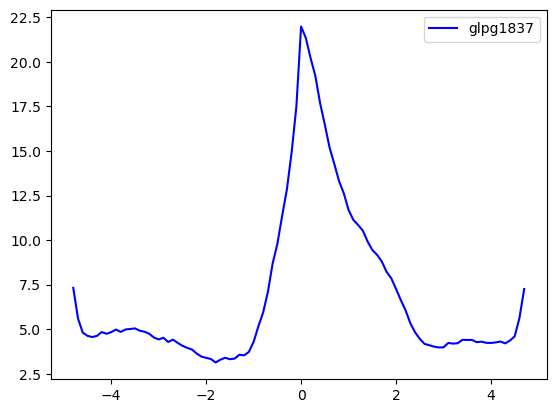

In [7]:
#specify input file

cftr_west = "/home/jonathan/Documents/grabelab/cftr/ligand-simulations/"

h5paths_names = [[f"{cftr_west}/nonlipidated/westpa/westpa-63/west-041525-1055.h5", "glpg1837", "blue"]]

#westpa rounds to load
minround = 150
maxround = -1

#parameters related to data processing
n_walkers = 6
we_bins = np.arange(-5,5,0.1)
#np.arange(0,6,.02) #for refeaturized data
n_pc2_vals = 1 

threshold = 5
plot_bayesian_error_bars = False #do not use until the log(mean) vs mean(log) issue is fixed

#saving figure
#a value of "" saves no figure
figure_name = ""

legend = []

#build msms
for h5pn in h5paths_names:  
    trjs, pclims, pcinit, trjs_binned_all0, plot_data_1 = build_pyemma_msm_webins(h5pn[0], "", minround, maxround, n_pc2_vals, we_bins, threshold, n_walkers, plot_bayesian_error_bars, figure_name)
    plt.plot(plot_data_1[0], plot_data_1[1], color = h5pn[2])
    legend.append(h5pn[1])
    
plt.legend(legend)
